In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.datasets import load_breast_cancer 
from sklearn import decomposition, datasets
from sklearn.svm import SVC, SVR
import os, sys
import torch.nn as nn
import torch.optim as optim

In [3]:
py_file_location = "/content/drive/MyDrive/Machine_Learning/Data"
sys.path.append(os.path.abspath(py_file_location))


In [4]:
import my_functions
import torch
import torch.optim as optim 

In [5]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [6]:
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [7]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [8]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [9]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer1 = optim.SGD([params], lr=learning_rate)
t_un =  t_u * .1 
final_params = training_loop(
n_epochs = 5000,
optimizer= optimizer1,
params = params,
t_u = t_un,
t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [10]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_un =  t_u * .1 
final_params = training_loop(
n_epochs = 5000,
optimizer= optimizer,
params = params,
t_u = t_un,
t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [11]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.SGD([params], lr=learning_rate)
t_un =  t_u * .1 
final_params = training_loop(
n_epochs = 5000,
optimizer= optimizer,
params = params,
t_u = t_un,
t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [12]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)
t_un =  t_u * .1 
final_params = training_loop(
n_epochs = 5000,
optimizer= optimizer,
params = params,
t_u = t_un,
t_c = t_c)

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123478
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


tensor([ 3.0532, 11.5655, 12.8230, 29.2128, 11.7800,  8.1010,  2.5152, -0.1643,
         7.8745, 14.0810, 19.1098], grad_fn=<AddBackward0>)


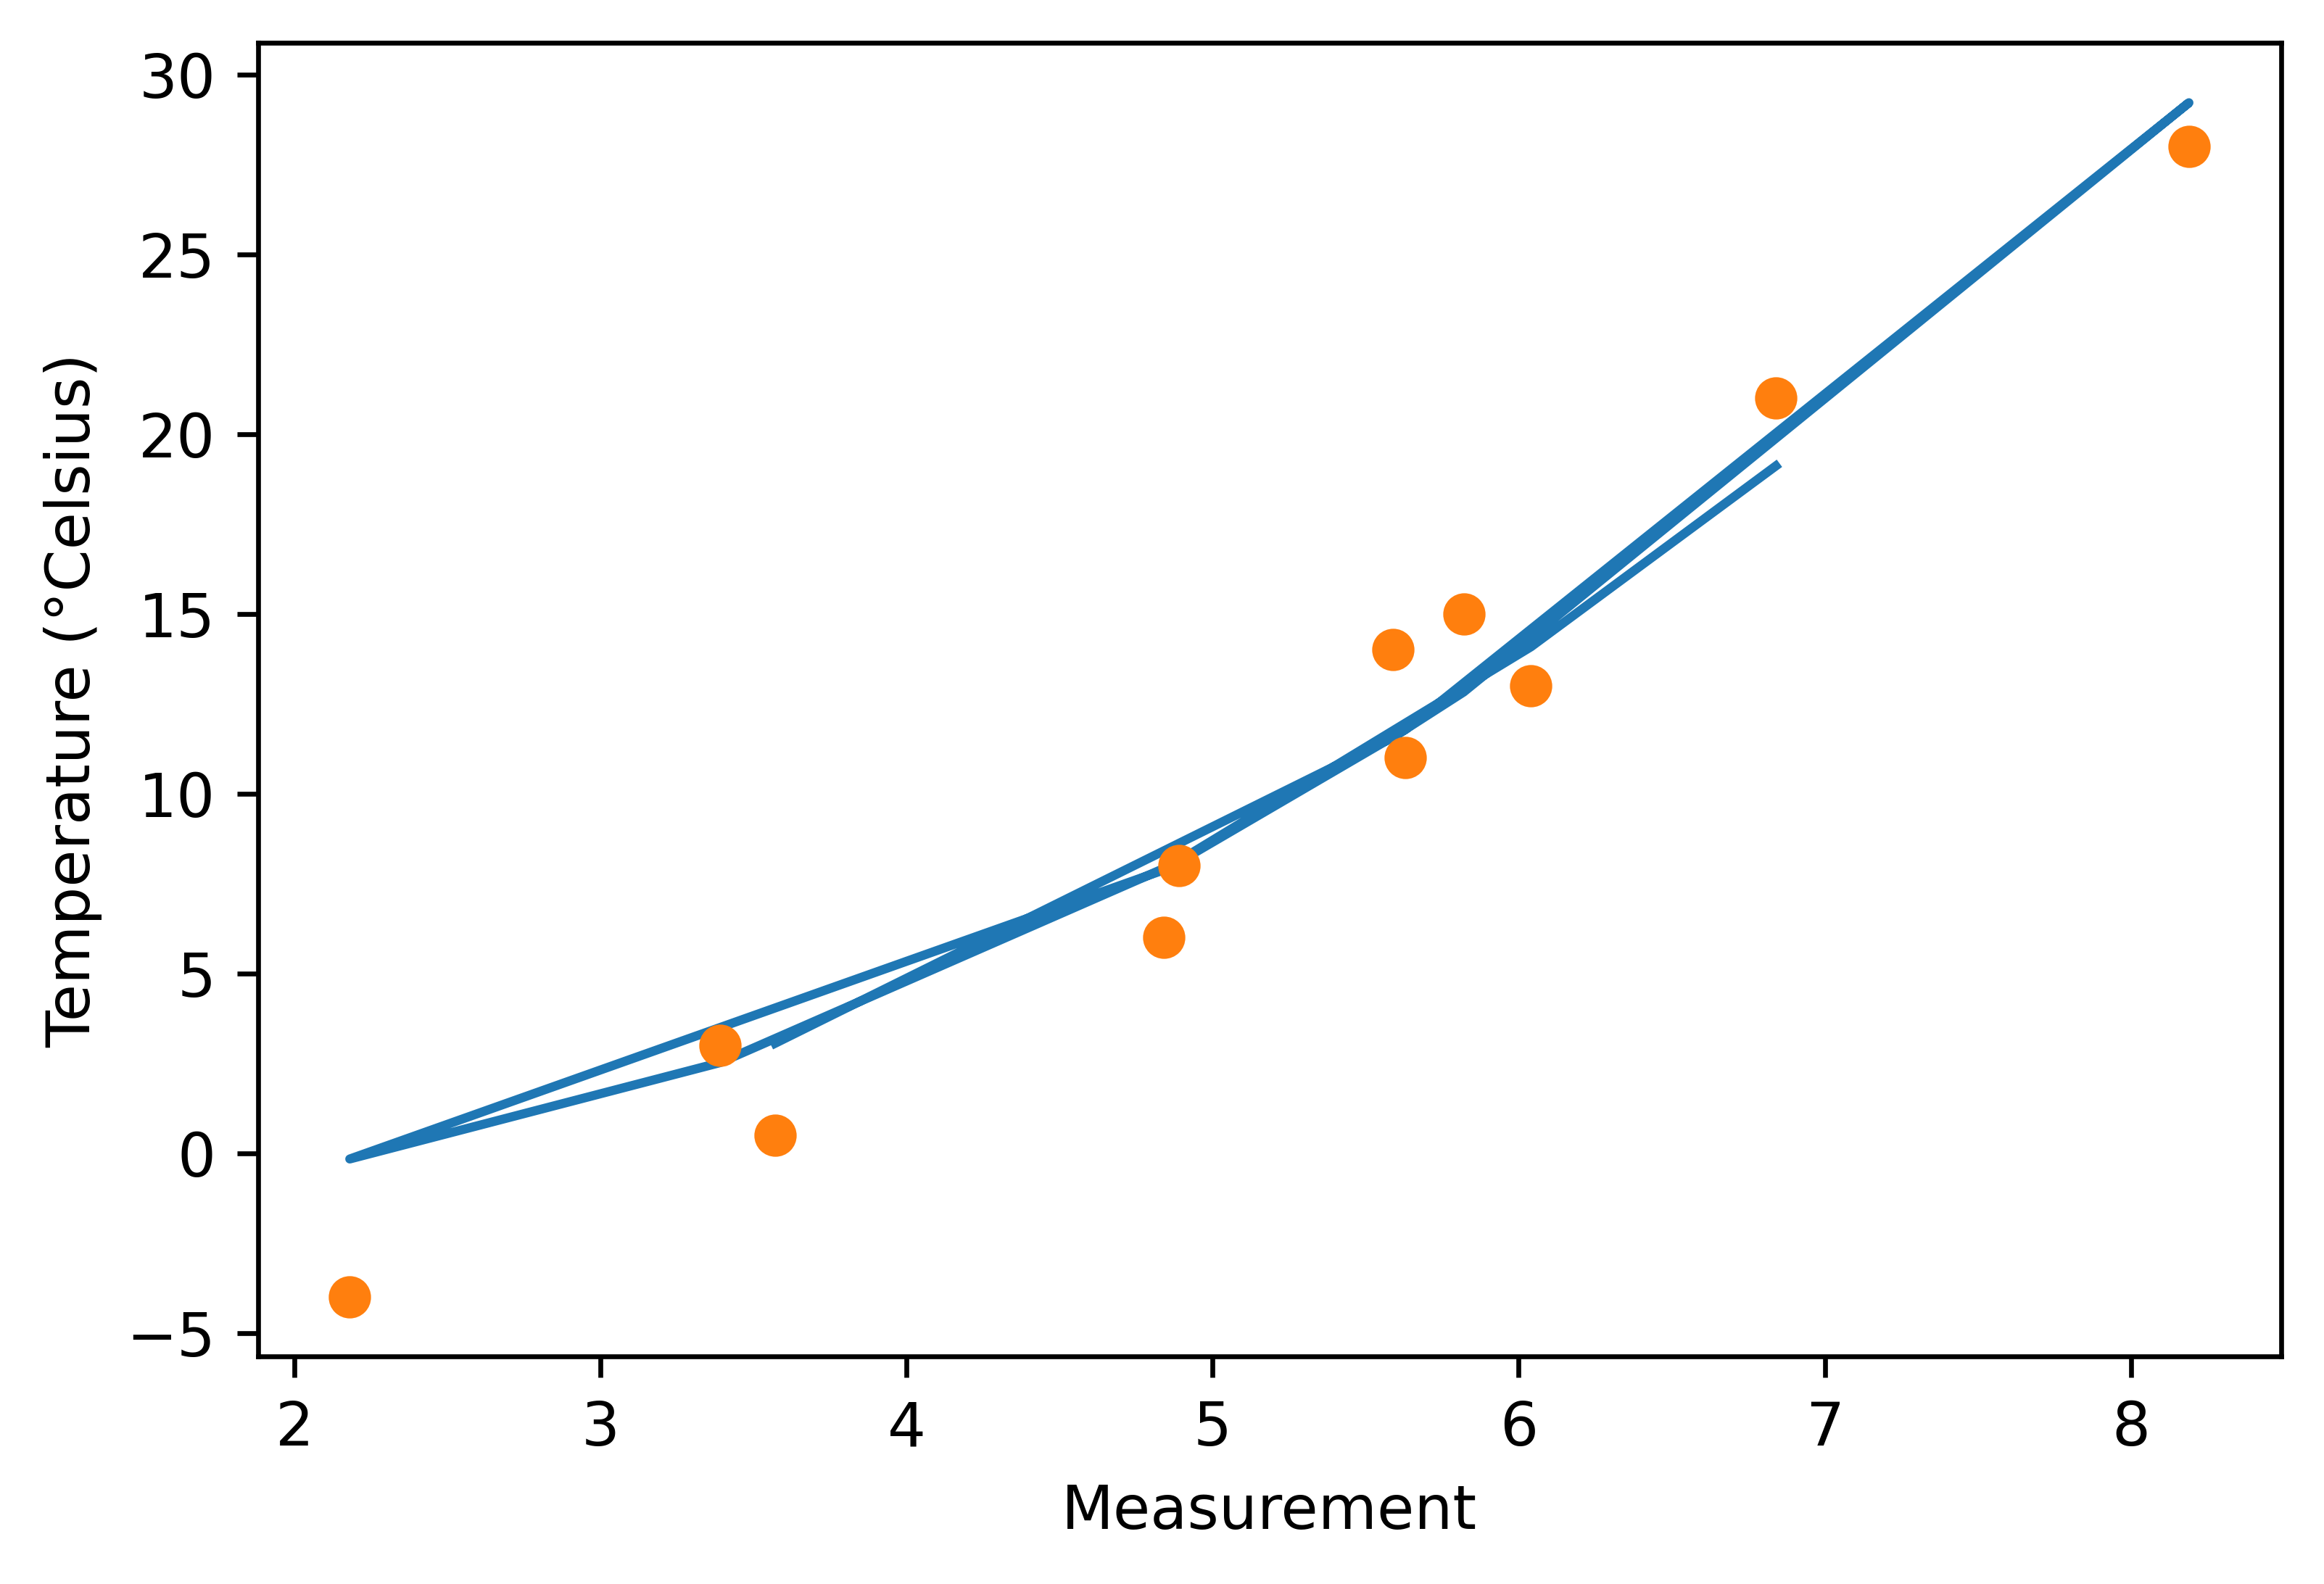

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
t_p = model(t_un, *final_params)  # <1>
print(t_p)
dope = np.copy(t_p.detach().numpy())
cool = np.copy(t_un.numpy())
fig = plt.figure(dpi=600)
plt.xlabel("Measurement")
plt.ylabel("Temperature (°Celsius)")
plt.plot(cool, dope )
plt.plot(cool, t_c, 'o')


# Problem 2

In [14]:
d_path ='/content/drive/MyDrive/Machine_Learning/Data'

df_h = pd.DataFrame(pd.read_csv(d_path +'/Housing.csv'))
df_h = df_h[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']]


In [15]:
    df_sh = my_functions.clense_data(df_h, stand= True, classification= None)
    

In [16]:
X_train0, X_test0, Y_train0, Y_test0 = my_functions.SplitData(df_sh, 'price', split= .2, rand_state = 0)

In [17]:
X_train0_t = torch.tensor(X_train0.values.astype(np.float32))
X_test0_t =  torch.tensor(X_test0.values.astype(np.float32))
Y_train0_t =  torch.tensor(Y_train0.values.astype(np.float32))
Y_test0_t =  torch.tensor(Y_test0.values.astype(np.float32))

In [18]:
def model0(t_u,W5, W4, W3, W2, W1, b):
    return t_u[:,0]*W5 + W4*t_u[:,1] + W3*t_u[:,2]  + W2*t_u[:,2] + W1*t_u[:,2] + b

In [19]:
def training_loop_tsplit(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model0(train_t_u, *params) # <1>
        train_loss = loss_fn(train_t_p, train_t_c)
                             
        val_t_p = model0(val_t_u, *params) # <1>
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward() # <2>
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return params

In [20]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)
final_params0 = training_loop_tsplit(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = X_train0_t, # <1> 
    val_t_u = X_test0_t, # <1> 
    train_t_c = Y_train0_t,
    val_t_c = Y_test0_t)

Epoch 1, Training loss 14.9826, Validation loss 18.6310
Epoch 2, Training loss 14.9660, Validation loss 18.6096
Epoch 3, Training loss 14.9494, Validation loss 18.5883
Epoch 500, Training loss 8.7755, Validation loss 10.6463
Epoch 1000, Training loss 5.3772, Validation loss 6.2838
Epoch 1500, Training loss 3.5126, Validation loss 3.8979
Epoch 2000, Training loss 2.4823, Validation loss 2.5860
Epoch 2500, Training loss 1.9069, Validation loss 1.8589
Epoch 3000, Training loss 1.5809, Validation loss 1.4512
Epoch 3500, Training loss 1.3922, Validation loss 1.2189
Epoch 4000, Training loss 1.2800, Validation loss 1.0836
Epoch 4500, Training loss 1.2110, Validation loss 1.0025
Epoch 5000, Training loss 1.1667, Validation loss 0.9520


In [21]:

params2 = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer1 = optim.SGD([params], lr=learning_rate)
final_params1 = training_loop_tsplit(
    n_epochs = 5000, 
    optimizer = optimizer1,
    params =  torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True),
    train_t_u = X_train0_t, # <1> 
    val_t_u = X_test0_t, # <1> 
    train_t_c = Y_train0_t,
    val_t_c = Y_test0_t)

Epoch 1, Training loss 14.9826, Validation loss 18.6310
Epoch 2, Training loss 14.9826, Validation loss 18.6310
Epoch 3, Training loss 14.9826, Validation loss 18.6310
Epoch 500, Training loss 14.9826, Validation loss 18.6310
Epoch 1000, Training loss 14.9826, Validation loss 18.6310
Epoch 1500, Training loss 14.9826, Validation loss 18.6310
Epoch 2000, Training loss 14.9826, Validation loss 18.6310
Epoch 2500, Training loss 14.9826, Validation loss 18.6310
Epoch 3000, Training loss 14.9826, Validation loss 18.6310
Epoch 3500, Training loss 14.9826, Validation loss 18.6310
Epoch 4000, Training loss 14.9826, Validation loss 18.6310
Epoch 4500, Training loss 14.9826, Validation loss 18.6310
Epoch 5000, Training loss 14.9826, Validation loss 18.6310


In [22]:
params3 = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer2 = optim.SGD([params], lr=learning_rate)
final_params3 = training_loop_tsplit(
    n_epochs = 5000, 
    optimizer = optimizer2,
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True),
    train_t_u = X_train0_t, # <1> 
    val_t_u = X_test0_t, # <1> 
    train_t_c = Y_train0_t,
    val_t_c = Y_test0_t)

Epoch 1, Training loss 14.9826, Validation loss 18.6310
Epoch 2, Training loss 14.9826, Validation loss 18.6310
Epoch 3, Training loss 14.9826, Validation loss 18.6310
Epoch 500, Training loss 14.9826, Validation loss 18.6310
Epoch 1000, Training loss 14.9826, Validation loss 18.6310
Epoch 1500, Training loss 14.9826, Validation loss 18.6310
Epoch 2000, Training loss 14.9826, Validation loss 18.6310
Epoch 2500, Training loss 14.9826, Validation loss 18.6310
Epoch 3000, Training loss 14.9826, Validation loss 18.6310
Epoch 3500, Training loss 14.9826, Validation loss 18.6310
Epoch 4000, Training loss 14.9826, Validation loss 18.6310
Epoch 4500, Training loss 14.9826, Validation loss 18.6310
Epoch 5000, Training loss 14.9826, Validation loss 18.6310


In [23]:
params4 = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

learning_rate = 1e-1
optimizer3 = optim.SGD([params], lr=learning_rate)
final_params4 = training_loop_tsplit(
    n_epochs = 5000, 
    optimizer = optimizer3,
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True),
    train_t_u = X_train0_t, # <1> 
    val_t_u = X_test0_t, # <1> 
    train_t_c = Y_train0_t,
    val_t_c = Y_test0_t)

Epoch 1, Training loss 14.9826, Validation loss 18.6310
Epoch 2, Training loss 14.9826, Validation loss 18.6310
Epoch 3, Training loss 14.9826, Validation loss 18.6310
Epoch 500, Training loss 14.9826, Validation loss 18.6310
Epoch 1000, Training loss 14.9826, Validation loss 18.6310
Epoch 1500, Training loss 14.9826, Validation loss 18.6310
Epoch 2000, Training loss 14.9826, Validation loss 18.6310
Epoch 2500, Training loss 14.9826, Validation loss 18.6310
Epoch 3000, Training loss 14.9826, Validation loss 18.6310
Epoch 3500, Training loss 14.9826, Validation loss 18.6310
Epoch 4000, Training loss 14.9826, Validation loss 18.6310
Epoch 4500, Training loss 14.9826, Validation loss 18.6310
Epoch 5000, Training loss 14.9826, Validation loss 18.6310


# Problem 3

In [24]:
X_train1_t = torch.tensor(X_train0.values.astype(np.float32))
X_test1_t =  torch.tensor(X_test0.values.astype(np.float32))
Y_train1_t =  torch.tensor(Y_train0.values.astype(np.float32))
Y_test1_t =  torch.tensor(Y_test0.values.astype(np.float32))

In [25]:
my_model0 = nn.Sequential(
                nn.Linear(5,8),
                nn.Tanh(),  
                nn.Linear(8,16),
                nn.Tanh(),
                nn.Linear(16,1)) 

In [29]:
def training_loop_nn(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 50 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [30]:
OPTIM = optim.SGD(my_model0.parameters(), lr = 1e-3)

training_loop_nn(
    n_epochs = 200, 
    optimizer = OPTIM,
    model = my_model0,
    loss_fn = loss_fn,
    t_u_train = X_train1_t,
    t_u_val = X_test1_t, 
    t_c_train = Y_train1_t,
    t_c_val = Y_test1_t)

Epoch 1, Training loss 0.8191, Validation loss 0.6482
Epoch 50, Training loss 0.7890, Validation loss 0.6220
Epoch 100, Training loss 0.7601, Validation loss 0.5971
Epoch 150, Training loss 0.7328, Validation loss 0.5739
Epoch 200, Training loss 0.7072, Validation loss 0.5523


In [31]:
X_train2_t = torch.tensor(X_train0.values.astype(np.float32))
X_test2_t =  torch.tensor(X_test0.values.astype(np.float32))
Y_train2_t =  torch.tensor(Y_train0.values.astype(np.float32))
Y_test2_t =  torch.tensor(Y_test0.values.astype(np.float32))

In [34]:
my_model1 = nn.Sequential(
                nn.Linear(5,8), 
                nn.Tanh(), 
                nn.Linear(8,16),
                nn.Tanh(),
                nn.Linear(16, 32),
                nn.ReLU(),
                nn.Linear(32,16),
                nn.Tanh(),
                nn.Linear(16,1)) 

In [35]:
OPTIM1 = optim.SGD(my_model0.parameters(), lr = 1e-3)

training_loop_nn(
    n_epochs = 200, 
    optimizer = OPTIM1,
    model = my_model1,
    loss_fn = loss_fn,
    t_u_train = X_train2_t,
    t_u_val = X_test2_t, 
    t_c_train = Y_train2_t,
    t_c_val = Y_test2_t)

Epoch 1, Training loss 1.0539, Validation loss 0.8296
Epoch 50, Training loss 1.0539, Validation loss 0.8296
Epoch 100, Training loss 1.0539, Validation loss 0.8296
Epoch 150, Training loss 1.0539, Validation loss 0.8296
Epoch 200, Training loss 1.0539, Validation loss 0.8296
